In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
train = pd.read_csv('../Datasets/NB.csv')
train['Fault'] = 0

test = pd.read_csv('../Datasets/IR - 7.csv')
test['Fault'] = 1

In [5]:
dataset = pd.concat([train, test], ignore_index=True)

dataset

,DE,FE,Fault
0,0.064254,0.038625,0
1,0.063002,0.096769,0
2,-0.004381,0.127382,0
3,-0.035882,0.144640,0
4,-0.023991,0.086702,0
...,...,...,...
242305,0.135958,-0.047255,1
242306,-0.083167,-0.070882,1
242307,0.391469,-0.181005,1
242308,0.185501,0.136011,1


In [6]:
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
y_train

104802    0
121162    1
178869    1
15253     0
78974     0
         ..
176963    1
117952    0
173685    1
43567     0
199340    1
Name: Fault, Length: 193848, dtype: int64

In [11]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(
    n_estimators = 10, 
    criterion = 'entropy', 
    random_state = 0
)
classifier.fit(X_train, y_train)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [13]:
classifier.score(X_test, y_test)

0.8546696380669391

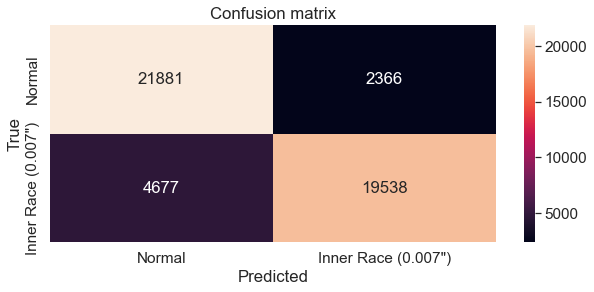

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal','Inner Race (0.007")']  
columns = ['Normal','Inner Race (0.007")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [15]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal','Inner Race (0.007")'])
print(cr)

                     precision    recall  f1-score   support

             Normal       0.82      0.90      0.86     24247
Inner Race (0.007")       0.89      0.81      0.85     24215

           accuracy                           0.85     48462
          macro avg       0.86      0.85      0.85     48462
       weighted avg       0.86      0.85      0.85     48462



In [16]:
normal, IR = cm
anomalies = normal[1] + IR[0]
print("Anomalies: {}".format(anomalies))

Anomalies: 7043
